<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 2 </H3>
<hr style="height:2px;border:none"/>



# Temas

* Regresión Lineal
* Regularización
* Selección de Características
* Reducción de Dimensionalidad


# Reglas & Formalidades

* Pueden trabajar en equipos de 2 a 3 personas. 
* Los equipos deben ser inscritos antes del 10 de Noviembre.
* Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente. 
* Si resulta necesaria, la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 

# Entregables 




> * **Video:** Se debe preparar un video explicativo de **15 a 20 minutos** donde se describe la metodología utilizada, los resultados obtenidos y las conclusiones de la experiencia. 

> * **Código:** Se debe enviar un jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Como alternativa, se puede entregar un link Github con el código fuente, incluyendo instrucciones precisas para ejecutar los experimentos. En cualquier caso (notebook o repo) el código debe estar ordenado y seccionado apropiadamente.

> * **Conformidad Ética:** Se debe incluir una breve declaración ética en que se indique que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas. Se debe también mencionar brevemente cuál fue la contribución de cada miembro del equipo. La declaración puede ser parte del notebook o estar en un archivo dentro del repo.

> * **Defensa en vivo (video-conferencia):** El día de clases agendado para la discusión del taller, se seleccionarán aleatoriamente algunos equipos que presentarán oralmente su trabajo ante el curso. Los autores serán evaluados considerando la discusión y debate que generen entre sus pares. Los puntos obtenidos (positivos o negativos) se sumarán a la nota final de taller.

# Fechas

> * Defensas: 26 de Noviembre, horario de clases.
> * Fecha de entrega de vídeo: 27 de Noviembre 23:59 Hrs. (1 días después de encuentro).
> * Fecha de entrega de Jupyter (notebook): 26 de Noviembre 08:00 (se pueden hacer actualizaciones hasta el 27 de Noviembre 23:59 Hrs.). 


# Instrucciones

La tarea se divide en dos secciones:



> **1. Pregunta de Investigación**. Para esta parte, los autores deben elegir una hipótesis de investigación y diseñar un procedimiento experimental que permita reunir evidencia en contra o a favor de la misma. Es legítimo tomar una posición *a-priori* en base a lo que han aprendido en el curso, pero es importante analizar críticamente los resultados sin descartar hipótesis alternativas. 

> La metodología debe incluir al menos 3 datasets, de los cuales al menos 2 deben ser reales. Es deseable también que incluyan experimentos controlados sobre dataset sintéticos o semi-sintéticos no triviales diseñados por ustedes. Por ejemplo, para demostrar que un método logra ignorar variables irrelevantes se podrían crear variables "fake" manualmente. Experimentos de este último tipo que se basen en un dataset real contarán como realizados sobre "dataset reales".

> Si no es relevante para la pregunta de investigación y en honor al tiempo, no es necesario llevar a cabo un análisis exploratorio detallado sobre cada dataset utilizado.

>  **2. Desafío Kaggle**. Para esta parte, los autores enfrentarán un desafío en la plataforma Kaggle y serán calificados en base a su posición en el tablero de resultados y el puntaje obtenido.


# Parte 1. Pregunta de Investigación

> **1. Regresión Lineal:** Expandir un modelo de regresión lineal con características polinomiales reduce siempre el error de entrenamiento pero no necesariamente el error de predicción.

> **2. Regresión Lineal:** Al entrenar un modelo de regresión lineal con pocos ejemplos y muchas características ($d > n$), la varianza de los estimadores de mínimos cuadrados aumenta y de consecuencia aumenta también la varianza de las predicciones que hace el modelo obtenido.

> **3. Regresión Lineal:** En un problema de regresión en que la respuesta (y) tiene una gran cantidad de \emph{outliers}, entrenar el modelo lineal con una función de costo (loss) más robusta que el error cuadrático (como la función de Huber) permite mejorar el error de predicción.

> **4. Regresión Lineal:** Filtrar los atributos con muchos outliers antes de entrenar un modelo lineal de regresión permite mejorar el error de predicción.

> **5. Regularización:** Sabemos que entrenar un modelo lineal agregando ruido blanco a los atributos es matemáticamente equivalente a usar el regularizador $L_2$. En la práctica sin embargo, el primer método resulta mucho más efectivo. 

> **6. Regularización:** Al entrenar un modelo lineal sobre texto, usando bigramas y trigramas, resulta fundamental equipar el modelo con un regularizador para prevenir overfitting.

> **7. Regularización:** Usar el regularizador $L_2$ en un modelo lineal de clasificación (como el \emph{regresor logístico}) resulta más efectivo y más eficiente que usar el regularizador $L_1$.

> **8. Regularización:** Combinar el regularizador $L_2$ con el regularizador $L_1$ en un modelo lineal de regresión resulta más efectivo que cualquiera de las dos técnicas por separado.

> **9. Regularización:** Al momento de elegir el valor del parámetro de regularización mediante validación cruzada, la regla denominada ``one-standard-error rule'' permite obtener modelos lineales más dispersos sin deteriorar significativamente el error de predicción.  

> **10. Regularización:** Al computar el ``regularization path'' para el Lasso o Ridge Regression, la curva que corresponde a cada coeficiente es monótona y, en particular, no cambia de signo. Lo mismo ocurre con el error de validación cruzada correspondiente a los diferentes modelos obtenidos. 

> **11. Regularización:** En situaciones de fuerte co-linealidad entre atributos, el Lasso selecciona sólo una de las variables correlacionadas mientras que Ridge Regression mantiene todas las variables en el modelo reduciendo su peso de forma equitativa.

> **12. Reducción de Dimensionalidad**: Combinando el modelo lineal de regresión con PCA perdemos en términos de interpretabilidad pero mejoramos significativamente el error de predicción. 

> **13. Reducción de Dimensionalidad**: Entrenar un clasificador sobre una representación de menor dimensionalidad obtenida vía LDA resulta más efectivo que hacerlo sobre una representación encontrada vía PCA, aún si a la última se le permite utilizar más dimensiones.

> **14. Reducción de Dimensionalidad***: Un método lineal de reducción de dimensionalidad como PCA o LDA es mucho menos efectivo que un método no-lineales como TSNE para preservar la estructura de clases original. Esto resulta evidente al visualizar las proyecciones obtenidas y también al entrenar un clasificador sobre la nueva representación.

> **15. Selección de Características:** Para el modelo de regresión lineal, un filtrado individual de atributos basado en el $F$-score permite encontrar las $K$ variables que minimizan el error de predicción.

> **16. Selección de Características:** Seleccionar atributos para un problema de clasificación mediante el criterio denominado $\chi^2$ resulta más efectivo que hacerlo usando RELIEF. 

> **17. Selección de Características:** Seleccionar atributos para un problema de clasificación mediante el método denominado MRMR (Minimum-Redundancy-Maximum-Relevance) resulta más efectivo que hacerlo filtrando vía Información Mutual individual. 

> Nota: Hay varias implementaciones públicas de MRMR compatibles con Sklearn. Ver por ejemplo emph{https://github.com/smazzanti/mrmr}

> **18. Selección de Características:** Cuando se utiliza Forward Stepwise Selection junto a un modelo lineal de regresión, la estrategia de elegir la variable a incorporar re-entrenando el modelo y estimando su error de predicción, resulta notablemente más efectiva que hacer la elección usando un estimador de la correlación lineal de las variables con la respuesta (y).

> **19. Selección de Características:** En problemas de clasificación con datos altamente dimensionales (al menos varias decenas de atributos), el método RELIEF es más efectivo y eficiente que el método denominado MRMR (Minimum-Redundancy-Maximum-Relevance)

> Nota: Hay varias implementaciones públicas de MRMR compatibles con Sklearn. Ver por ejemplo emph{https://github.com/smazzanti/mrmr}


> **20. Selección de Características:** Al entrenar un modelo lineal sobre texto, seleccionar atributos mediante el criterio denominado $\chi^2$ resulta mucho más efectivo que hacerlo vía RELIEF.



# Parte 2. Desafío Kaggle 

Una de las paradojas más bizarras e interesantes de esta pandemia ha sido la masificación del concepto nómade digital: una persona, generalmente joven, que se pasa la vida viajando y trabajando de manera remota, a veces desde lugares inusuales y paradisíacos. En palabras de la multitud de personas que durante el último año se han sumado a este estilo de vida, la razón es tan simple como envidiable: "Si tenemos que trabajar en línea, ¿porqué no hacerlo desde un país exótico?".  

Para esta parte del taller, tendrán que constuir un modelo capaz de predecir el precio de un paquete de viajes orientado a nómades digitales a partir de una serie de detalles como el destino o itinerario, los hoteles y comidas incluídas, los vuelos involucrados, etc. 

Para acceder a loss detalles del desafío ingrese al siguiente link: https://www.kaggle.com/c/nomades-digitales/



## 1. Importación de librerías

In [1]:
# Fundamentals
import numpy as np
import spacy
import json
import pandas as pd
import datetime as dt
import re
from scipy import stats

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import svm
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

## 2. Descripción Dataset

## 3. Recopilación de datos

In [4]:
# Import train and test sets
train = pd.read_csv("./datasets/travel_packages_train.csv")
test = pd.read_csv("./datasets/travel_packages_test.csv")

In [5]:
# Fix columns names
train = train.rename(columns = {"Unnamed: 0": "Index"})
train.columns = train.columns.str.lower().str.replace(' ','_')
test = test.rename(columns = {"Unnamed: 0": "Index"})
test.columns = test.columns.str.lower().str.replace(' ','_')

## 4. Exploración de datos

In [6]:
train.shape

(15750, 15)

In [7]:
# Column names
print(train.columns)

Index(['index', 'package_name', 'package_type', 'destination', 'itinerary',
       'places_covered', 'travel_date', 'hotel_details', 'start_city',
       'airline', 'flight_stops', 'meals', 'sightseeing_places_covered',
       'cancellation_rules', 'ppprice'],
      dtype='object')


In [8]:
# Number of uniques values per column
print(train.nunique(axis=0))

index                         15750
package_name                   2171
package_type                      5
destination                     563
itinerary                       964
places_covered                  563
travel_date                     481
hotel_details                  5158
start_city                        2
airline                         272
flight_stops                      3
meals                             4
sightseeing_places_covered     1650
cancellation_rules                8
ppprice                         701
dtype: int64


## 5 Preprocesamiento de datos

### 5.1 Data Cleaning

In [9]:
train.isnull().values.any()

False

In [10]:
test.isnull().values.any()

False

In [11]:
train.head()

,index,package_name,package_type,destination,itinerary,places_covered,travel_date,hotel_details,start_city,airline,flight_stops,meals,sightseeing_places_covered,cancellation_rules,ppprice
0,7919,North East - Gangtok and Lachung,Deluxe,Gangtok|Lachung|Gangtok,1N Gangtok . 2N Lachung . 1N Gangtok,Gangtok|Lachung|Gangtok,10-01-2022,Summit Denzong Hotel & Spa:4.5|Summit Alpine R...,New Delhi,Spicejet|Spicejet,1,3,Singhik View Point | Chungthang | Yumthang Va...,Cancellation any time after making the 1st pay...,284.0
1,982,Spiritual Haridwar from Delhi,Budget,Haridwar,2N Haridwar,Haridwar,21-11-2021,Not Available,Mumbai,Not Available,2,2,Har Ki Pauri,Cancellation any time after making the 1st pay...,129.0
2,3211,Rajasthan Adventure Special with Guided Leopar...,Premium,Jodhpur|Jaisalmer,2N Jodhpur . 2N Jaisalmer,Jodhpur|Jaisalmer,06-08-2021,Indana Palace Jodhpur:4.3|Jaisalmer Marriott R...,New Delhi,IndiGo,0,5,Hanwant Mahal | Candlelight Dinner in Jodhpur...,Cancellation any time after making the 1st pay...,311.0
3,3509,Bhutan 5N - Thimphu(2) Paro(3),Premium,Thimpu|Paro,2N Thimpu . 3N Paro,Thimpu|Paro,27-02-2021,Terma Linca Resort and Spa:4.5|Zhiwa Ling Hote...,New Delhi,Not Available,0,5,Simtokha Dzong | Memorial Chorten | Buddha Do...,Cancellation any time after making the 1st pay...,517.0
4,4820,Splendid North East - Pelling Special (Value a...,Deluxe,Gangtok|Pelling|Darjeeling,2N Gangtok . 1N Pelling . 2N Darjeeling,Gangtok|Pelling|Darjeeling,16-06-2021,Lemon Tree Hotel Gangtok:4.3|The Elgin Mount ...,New Delhi,Go Air,1,3,Changu Lake - Excursion | Baba Mandir | Tashi...,Cancellation any time after making the 1st pay...,336.0


### 5.2 Data integration

In [12]:
# Read file with distances
with open('distances.json', 'r') as fp:
    distancias = json.load(fp)

In [13]:
# Get average distance between two places
promedio = 0
for origen, destinos in distancias.items():
    
    if(np.isnan(np.nanmean(np.array(list(destinos.values()), dtype=np.float64)))):
        continue
    else:
        promedio = (promedio + np.nanmean(np.array(list(destinos.values()), dtype=np.float64)))/2

for origen, destinos in distancias.items():
    # Distancia promedio del origen a todos los destinos
    for destino, distancia in destinos.items():
        if(distancia == None or np.isnan(distancia)):
            distancias[origen][destino] = promedio
print(promedio)

3220.07333299853


<ipython-input-13-a41427ecd320>:5: RuntimeWarning: Mean of empty slice
  if(np.isnan(np.nanmean(np.array(list(destinos.values()), dtype=np.float64)))):


### 5.3 Data transformation

In [14]:
# Transform travel_date format to datetime
train['date'] = pd.to_datetime(train['travel_date'])
test['date'] = pd.to_datetime(test['travel_date'])

In [15]:
# Transform datetime to ordinal representation
train['date'] = train['date'].map(dt.datetime.toordinal)
test['date'] = test['date'].map(dt.datetime.toordinal)

In [16]:
# Get number of places included in package
train["number_places"] = train.apply(lambda row: len(row.places_covered.split("|")),axis=1)
test["number_places"] = test.apply(lambda row: len(row.places_covered.split("|")),axis=1)

In [17]:
# Get number of sightseeings (visits to tourist places)
train["number_sightseeing"] = train.apply(lambda row: len(row.sightseeing_places_covered.split("|")),axis=1)
test["number_sightseeing"] = test.apply(lambda row: len(row.sightseeing_places_covered.split("|")),axis=1)

In [18]:
#train["number_destination"] = train.apply(lambda row: len(row.destination.split("|")),axis=1)
#test["number_destination"] = test.apply(lambda row: len(row.destination.split("|")),axis=1)

In [19]:
# Encode package type as numbers
package_codes = {'Budget': 1, 'Standard': 2, 'Premium': 3, 'Deluxe': 4,'Luxury':5}
train["package_code"] = train.apply(lambda row: package_codes[row.package_type],axis=1)
test["package_code"] = test.apply(lambda row: package_codes[row.package_type],axis=1)

In [20]:
# Get meal quality score based on the package
train["meals_score"] = train["meals"] * train["package_code"]
test["meals_score"] = test["meals"] * train["package_code"]

In [21]:
# Get number of nights
train["nights"] = train.apply(lambda row: sum(map(int,re.findall("(\d+)N",row.itinerary))),axis=1)
test["nights"] = test.apply(lambda row: sum(map(int,re.findall("(\d+)N",row.itinerary))),axis=1)

In [22]:
# Get number of hotels with spa
train["spa"] = train.apply(lambda row: int("spa" in row.hotel_details.lower()),axis=1)
test["spa"] = test.apply(lambda row: int("spa" in row.hotel_details.lower()),axis=1)

Extraemos las aerolineas presentes en el dataset:

In [24]:
airline_df = pd.concat([train["airline"],test["airline"]])
airlines = []
for airline in np.unique(airline_df.values):
    airlines_flattened = np.array(airline.split('|')).flatten()
    for airline_flattened in airlines_flattened:
        airlines.append(airline_flattened)
airlines = list(set(airlines))

Se buscó en internet la el precio promedio x km de viaje en cada aerolinea (en USD):

In [25]:
cost_per_km = {'Qatar Airways': 0.11,
 'Singapore Airlines': 0.11,
 'Sichuan Airlines': 0.13,
 'China Southern': 0.11,
 'Thai Vietjet Air': 0.11,
 'Kenya Airways': 0.2,
 'Air Austral': 0.22,
 'AirAsia X': 0.07,
 'Ethiopian Airlines': 0.14,
 'AirAsia': 0.13,
 'EgyptAir': 0.15,
 'Air Seychelles': 0.15,
 'Malaysia Airlines': 0.13,
 'Airconnect': 0.13,
 'Air India': 0.15,
 'British Airways': 0.2,
 'Kuwait Airways': 0.11,
 'Malindo Air': 0.13,
 'Gulf Air': 0.11,
 'Jetstar Asia': 0.13,
 'Scoot': 0.11,
 'Uzbekistan Airways': 0.13,
 'Philippine Airlines': 0.12,
 'Brussels Airlines': 0.21,
 'Spicejet': 0.14,
 'AirAsia Indonesia': 0.08,
 'Go Air': 0.13,
 'Emirates':0.14,#nan
 'Air India Express': 0.08,
 'Norwegian': 0.17,
 'Swiss': 0.21,
 'Thai Airways': 0.13,
 'Bangkok Airways': 0.31,
 'Lufthansa': 0.22,
 'Cathay Pacific': 0.11,
 'South African Airways': 0.19,
 'Jetstar Airways': 0.13,
 'IndiGo': 0.12,
 'Vistara': 0.13,
 'Oman Air': 0.1,
 'Srilankan Airlines': 0.11,
 'Garuda Indonesia': 0.12,
 'Air Mauritius': 0.17,
 'China Eastern': 0.12,
 'Not Available':0.14,# nan
 'Etihad Airways': 0.1,
 'Qantas Airways': 0.1,
 'Aeroflot': 0.13,
 'Thai AirAsia': 0.18,
 'Silkair': 0.21,
 'Saudia': 0.12,
 'Turkish Airlines': 0.16,
 'Air New Zealand': 0.13,
 'Virgin Atlantic': 0.13,
 'Air Baltic': 0.19,
 'Finnair': 0.1}

Se reemplazaron los valores nan, por el promedio de los valores validos:

In [26]:
np.nanmean(np.array(list(cost_per_km.values()),dtype=np.float64))

0.14089285714285713

In [27]:
def count_spa(itinerary, hotel_details, nights):
    try:
        return sum(np.array(list(map(int,re.findall("(\d+)N",itinerary)))) * np.array((list(("spa" in s) for s in hotel_details.lower().split("|")))))
    except:
        return nights/2
def weighted_mean_rate(itinerary, hotel_details):
    itinerario = np.array(list(map(int,re.findall("(\d+)N",itinerary))))
    rates = np.array(list(map(float,re.findall("(\d\.\d)",hotel_details))))
    try:
        return sum(itinerario * rates)/sum(itinerario)
    except:
        return np.mean(rates) if len(rates)>0 else 4.2 # check

Contamos las noches en un hotel con spa (estimado):

In [28]:
# Get number of nights with spa (estimated sometimes)
train["nights_with_spa"] = train.apply(lambda row: count_spa(row.itinerary, row.hotel_details, row.nights),axis=1)
test["nights_with_spa"] = test.apply(lambda row: count_spa(row.itinerary, row.hotel_details, row.nights),axis=1)

Se obtiene el promedio ponderado de las calificaciones de los hoteles por la cantidad de noches que se está en cada uno:

In [29]:
# Get hotel quality mean weighted by number of nights in hotels 
train["hotels_score"] = train.apply(lambda row: weighted_mean_rate(row.itinerary, row.hotel_details),axis=1)
test["hotels_score"] = test.apply(lambda row: weighted_mean_rate(row.itinerary, row.hotel_details),axis=1)
train.hotels_score[train.hotels_score == 0] = train["hotels_score"][train["hotels_score"]!=0].mean()
test.hotels_score[test.hotels_score == 0] = train["hotels_score"][train["hotels_score"]!=0].mean()

<ipython-input-29-5c4301f6528a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.hotels_score[train.hotels_score == 0] = train["hotels_score"][train["hotels_score"]!=0].mean()
<ipython-input-29-5c4301f6528a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.hotels_score[test.hotels_score == 0] = train["hotels_score"][train["hotels_score"]!=0].mean()


In [30]:
train["hotels_score"].describe()

count    15750.000000
mean         4.128094
std          0.298292
min          1.500000
25%          4.000000
50%          4.200000
75%          4.250000
max          5.000000
Name: hotels_score, dtype: float64

In [31]:
# Encode start city
train = train.join(pd.get_dummies(train['start_city']))
test = test.join(pd.get_dummies(test['start_city']))

Se utiliza one-hot-encoding para las reglas de cancelación:

In [32]:
# Encode package of cancellation rules
cancellation_rules_code = dict(zip(train["cancellation_rules"].unique(), ['a','b','c','d','e','f','g','h']))

train["cancellation_rule_package"] = train.apply(lambda row: cancellation_rules_code.get(row.cancellation_rules,"i"),axis=1)
test["cancellation_rule_package"] = test.apply(lambda row: cancellation_rules_code.get(row.cancellation_rules,"i"),axis=1)

train = train.join(pd.get_dummies(train['cancellation_rule_package']))
train["i"] = 0

test = test.join(pd.get_dummies(test['cancellation_rule_package']))
test["e"] = 0
test["g"] = 0

Se obtuvo la distancia entre cada uno de los vuelos con ayuda de la distance matrix API de google maps:

In [33]:
def total_distance(row, distances):
    destinations = np.append(np.append(row.start_city,np.array(row.destination.split("|"))),row.start_city)
    distance = 0
    distances_list = []
    for i in range(len(destinations)-1):
        current_distance = distances[destinations[i]][destinations[i+1]] if ((destinations[i] in distances and destinations[i+1] in distances[destinations[i]])) else distances[destinations[i+1]][destinations[i]]
        distances_list.append(current_distance)
        distance = distance + current_distance
    return distance

In [35]:
def cost_por_km(row):
  mean_cost_airlines = np.mean(np.array([cost_per_km[i] for i in row.airline.split("|")],dtype=np.float64))
  return mean_cost_airlines

Se calcula la distancia total en base a todos los lugares visitados, considerando la ciudad de origen

In [36]:
# Get total distance
train["total_distance"] = train.apply(lambda row: total_distance(row,distancias),axis=1)
test["total_distance"] = test.apply(lambda row: total_distance(row,distancias),axis=1)

In [37]:
# Get mean cost per km
train["cost_per_km"] = train.apply(lambda row: cost_por_km(row),axis=1)
test["cost_per_km"] = test.apply(lambda row: cost_por_km(row),axis=1)

In [38]:
# Get mean total cost of airlines
train["cost_airlines"] = train["total_distance"] * train["cost_per_km"]
test["cost_airlines"] = test["total_distance"] * test["cost_per_km"]

In [39]:
# Get mean total cost of airlines
train["cost_airlines_by_type"] = train["total_distance"] * train["cost_per_km"] * train["package_code"]
test["cost_airlines_by_type"] = test["total_distance"] * test["cost_per_km"] * train["package_code"]

Se codifica la fecha en coordenadas polares para capturar la relación ciclica del año (365 días)

In [40]:
# Encode the date due to its cyclical nature
train["sin_date"] = train.apply(lambda row: np.sin(2*np.pi*(int(row.travel_date.split("-")[0])+(int(row.travel_date.split("-")[1])*30))/365),axis=1)
train["cos_date"] = train.apply(lambda row: np.cos(2*np.pi*(int(row.travel_date.split("-")[0])+(int(row.travel_date.split("-")[1])*30))/365),axis=1)

test["sin_date"] = test.apply(lambda row: np.sin(2*np.pi*(int(row.travel_date.split("-")[0])+(int(row.travel_date.split("-")[1])*30))/365),axis=1)
test["cos_date"] = test.apply(lambda row: np.cos(2*np.pi*(int(row.travel_date.split("-")[0])+(int(row.travel_date.split("-")[1])*30))/365),axis=1)

### Análisis distribucional

In [107]:
# Funciones de transformación para conseguir distribuciones normales
def cubo(x):
  return np.power(x,3)
def log_cubo(x):
  return np.log(np.power(x,3))
def test_transformations(variable, alpha=0, bins=20, plot=False, only_boxcox=False, title="Histogram"):
  # Recibe como input una columna de un dataframe, por ejemplo: df["number_places"]
  if plot:
    fig, ax = plt.subplots(figsize=(4,3))
    #ax = plt.hist(variable, bins=bins, color='b', edgecolor='w')
    ax = plt.distplot(variable, bins=bins, color='b', edgecolor='w')
    plt.title(title)
    plt.show

  try:
    variable_boxcox = stats.boxcox(variable,alpha)
    if plot:
      fig, ax = plt.subplots(figsize=(4,3))
      ax = plt.hist(variable_boxcox, bins=bins, color='b', edgecolor='w')
      plt.title('Box cox '+ str(alpha))
      plt.show
    if only_boxcox:
      return variable_boxcox
  except:
    print("Datos negativos, no es posible aplicar boxcox")
  
  variable_tr = variable.transform([np.sqrt, np.exp, np.log, np.reciprocal, np.square, cubo])
  if plot:
    variable_tr.hist(bins=20, layout=(3,3), edgecolor='k', figsize=(10,8))
    plt.suptitle("Transformed Output")
    plt.show()
  try:
    variable_tr['boxcox'] = variable_boxcox
  except:
    print("")
  return variable_tr

In [42]:
numerical_features = ['number_places','package_code', 
                      'meals_score','nights','nights_with_spa','hotels_score', 
                      'meals','flight_stops','total_distance','ppprice']

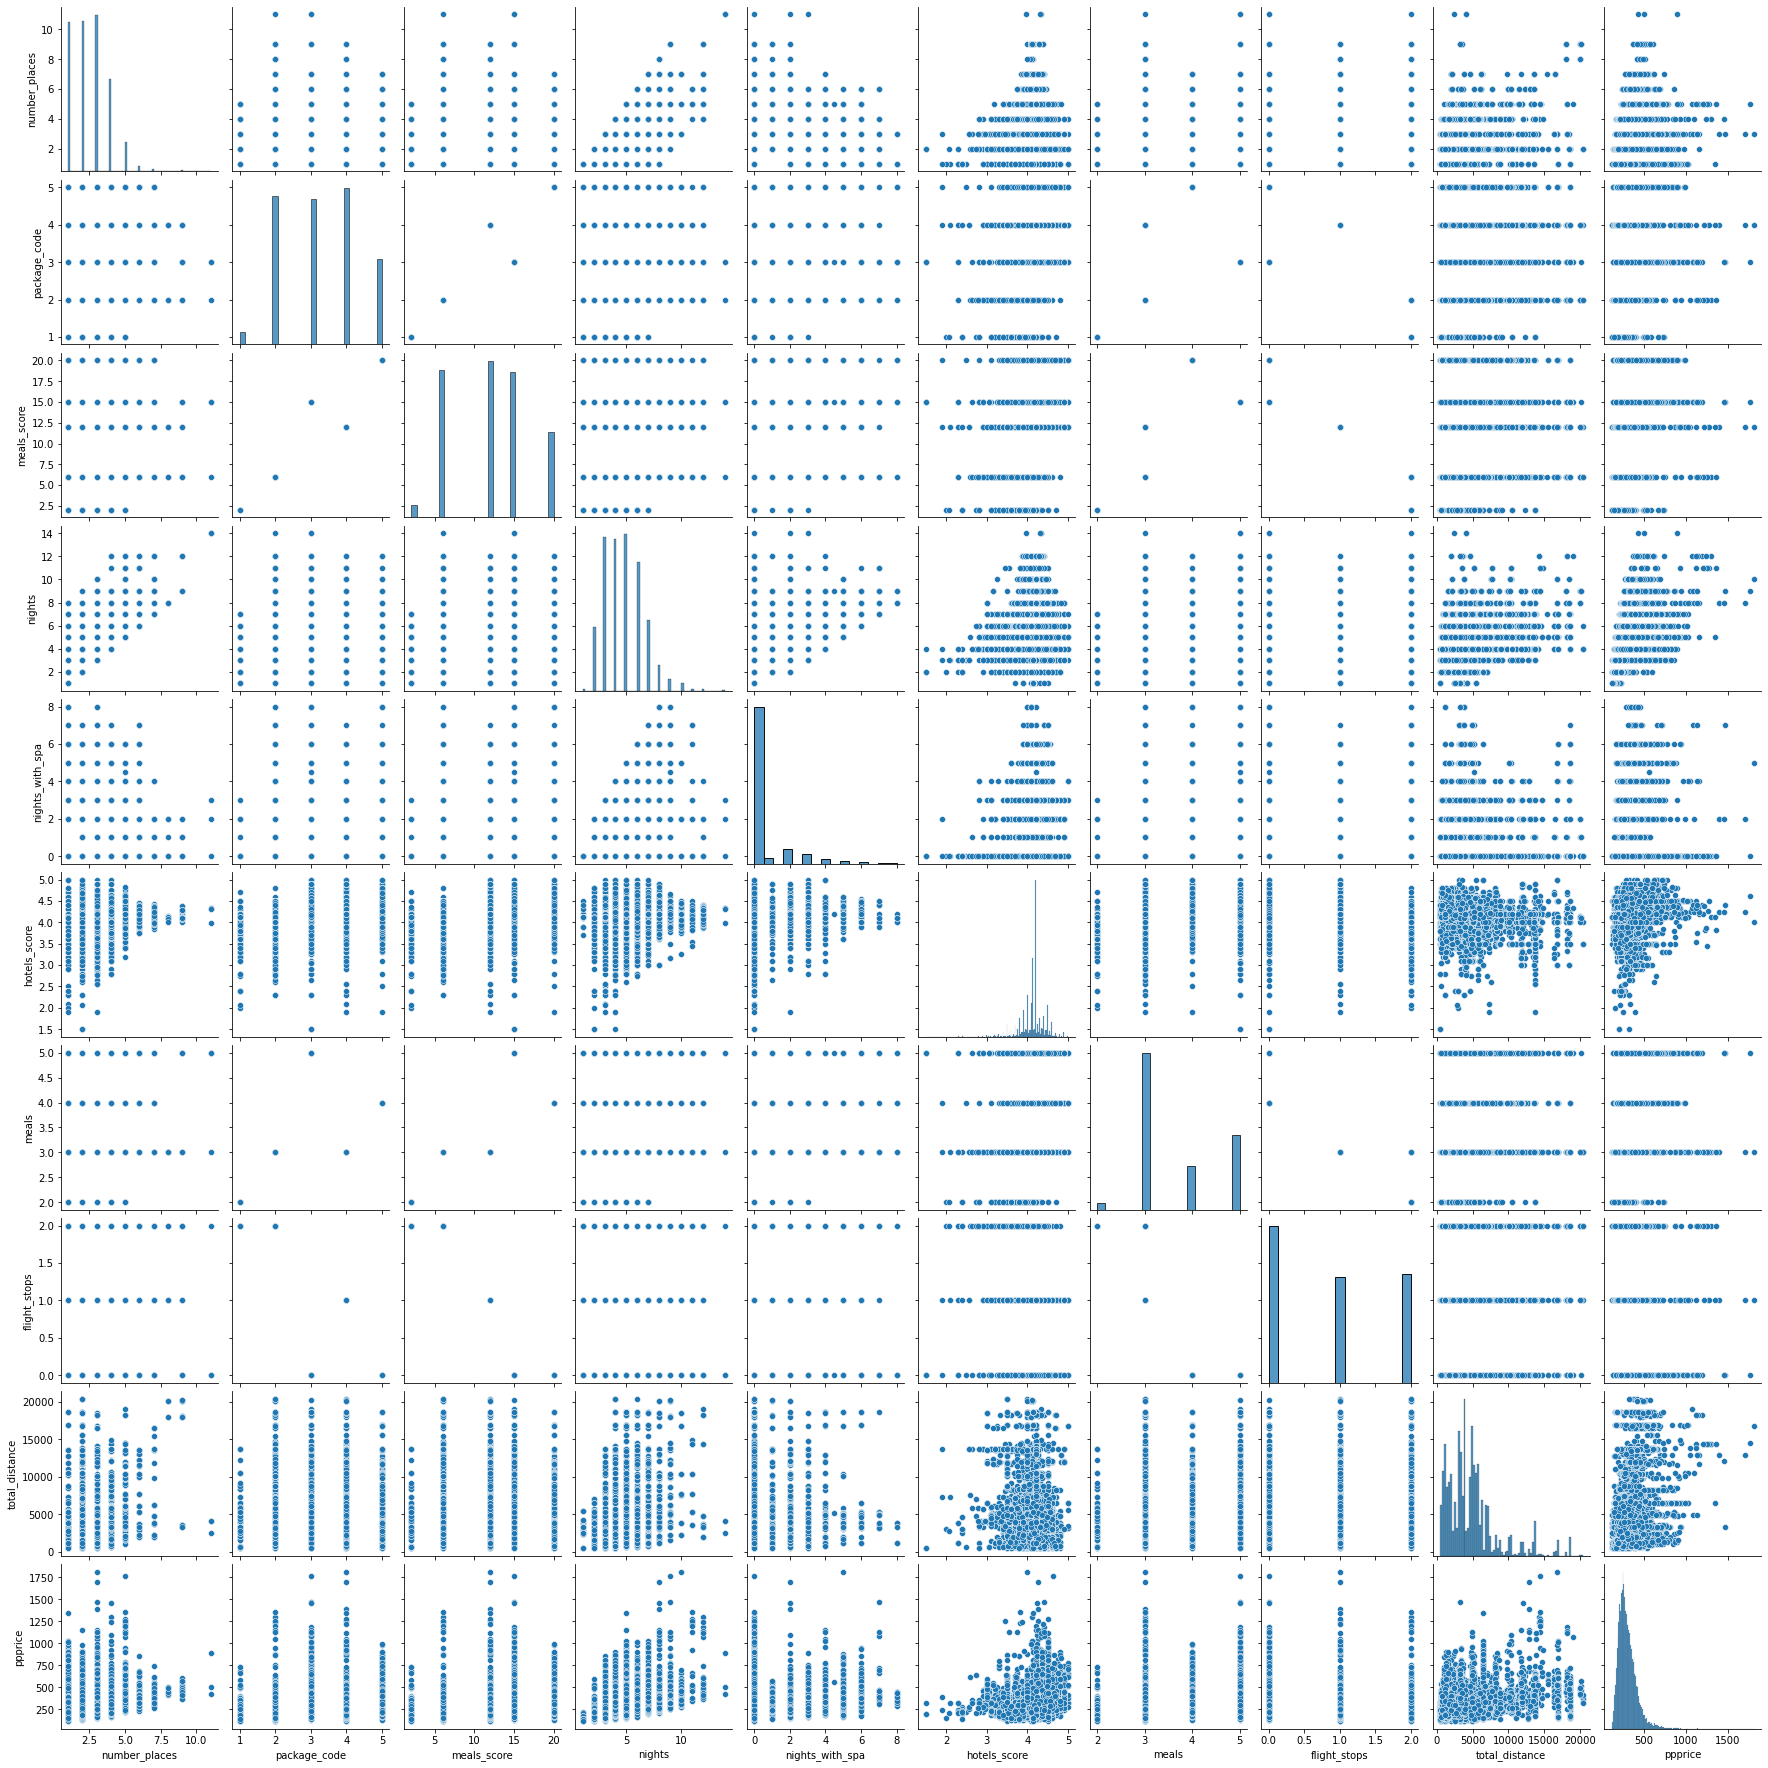

In [43]:
pairplot = sns.pairplot(train[numerical_features])

Se aplican transformaciones para llevar las distribuciones de las variables a una distribución normal:

In [44]:
# Transformación para conseguir distribución normal en meals score
train["norm_meals_score"] = test_transformations(train['meals_score'],0.25,bins=15, plot=False)["sqrt"]
test["norm_meals_score"] = test_transformations(test['meals_score'],0.25,bins=15, plot=False)["sqrt"]

In [45]:
# Transformación para conseguir distribución normal en package_code SIRVE
#train["sqrt_package_code"] = test_transformations(train['package_code'],0.67,bins=15, plot=False)["sqrt"]

In [46]:
# Transformación para conseguir distribución normal en nights
train["norm_nights"] = test_transformations(train['nights'],0.03,bins=15, plot=False)["boxcox"]
test["norm_nights"] = test_transformations(test['nights'],0.03,bins=15, plot=False)["boxcox"]

In [47]:
# Transformación para conseguir distribución normal en nights_with_spa
#train["boxcox_nights_with_spa"] = test_transformations(train['nights_with_spa'],0.03,bins=15, plot=True)["sqrt"]

In [48]:
# Transformación para conseguir distribución normal en hotels score SIRVE
#train["boxcox_hotels_score"] = test_transformations(train['hotels_score'],1.2,bins=15, plot=True)["boxcox"]

In [49]:
# Transformación para conseguir distribución normal en norm_meals
#train["norm_meals"] = test_transformations(train['meals'],1.2,bins=15, plot=True)["boxcox"]

In [50]:
# Transformación para conseguir distribución normal en flight_stops
#train["norm_flight_stops"] = test_transformations(train['flight_stops'],1.2,bins=15, plot=True)["boxcox"]

In [51]:
# Transformación para conseguir distribución normal en total_distance
train["norm_total_distance"] = test_transformations(train['total_distance'],0.08,bins=15, plot=False, only_boxcox=True)
test["norm_total_distance"] = test_transformations(test['total_distance'],0.08,bins=15, plot=False, only_boxcox=True)

In [52]:
# Transformación para conseguir distribución normal en total_distance
train["norm_cost_airlines"] = test_transformations(train['cost_airlines'],0.28,bins=15, plot=False, only_boxcox=True)
test["norm_cost_airlines"] = test_transformations(test['cost_airlines'],0.28,bins=15, plot=False, only_boxcox=True)

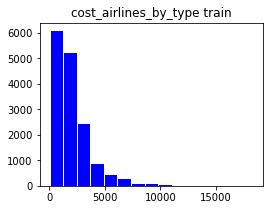

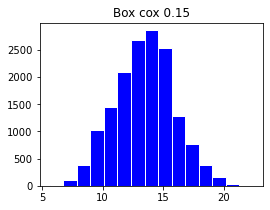

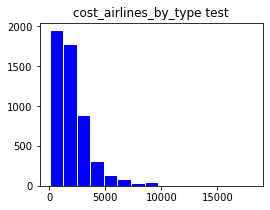

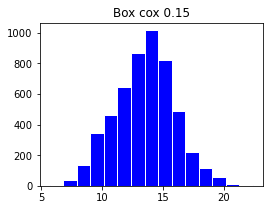

In [108]:
# Transformación para conseguir distribución normal en total_distance
train["norm_cost_airlines_by_type"] = test_transformations(train['cost_airlines_by_type'],0.15,bins=15, plot=True, only_boxcox=True, title="cost_airlines_by_type train")
test["norm_cost_airlines_by_type"] = test_transformations(test['cost_airlines_by_type'],0.15,bins=15, plot=True, only_boxcox=True, title="cost_airlines_by_type test")

### Transformaciones polinomiales

In [54]:
# Transformación polinomio grado 2
train["number_places_2"] = train["number_places"]**2
train["package_code_2"] = train["package_code"]**2
train["meals_score_2"] = train["meals_score"]**2
train["nights_2"] = train["nights"]**2
train["flight_stops_2"] = train["flight_stops"]**2
test["number_places_2"] = test["number_places"]**2
test["package_code_2"] = test["package_code"]**2
test["meals_score_2"] = test["meals_score"]**2
test["nights_2"] = test["nights"]**2
test["flight_stops_2"] = test["flight_stops"]**2

## 6. Data Analysis

Se proceden a seleccionar aquellas variables independientes que estén correlacionadas con la variable dependiente:

In [55]:
high_corr = (train.corr()["ppprice"][np.abs(train.corr()["ppprice"])>0.2]).index.values
remover = ['flight_stops_2','meals','number_places',
           'meals_score','nights','total_distance',
           'nights_2','cost_airlines','cost_airlines_by_type']
for deleted in remover:
  high_corr = np.delete(high_corr,np.where(high_corr == deleted))
print(high_corr)
train_high_corr = train[high_corr]
train_high_corr.head()

['flight_stops' 'ppprice' 'spa' 'nights_with_spa' 'a' 'b'
 'norm_meals_score' 'norm_nights' 'norm_total_distance'
 'norm_cost_airlines' 'norm_cost_airlines_by_type' 'number_places_2'
 'meals_score_2']


,flight_stops,ppprice,spa,nights_with_spa,a,b,norm_meals_score,norm_nights,norm_total_distance,norm_cost_airlines,norm_cost_airlines_by_type,number_places_2,meals_score_2
0,1,284.0,1,1.0,1,0,3.464102,1.415525,11.418240,16.386941,13.965649,9,144
1,2,129.0,0,0.0,1,0,1.414214,0.700404,11.367295,16.238549,10.025115,1,4
2,0,311.0,1,2.0,1,0,3.872983,1.415525,10.119394,12.150689,10.723336,4,225
3,0,517.0,1,2.0,1,0,3.872983,1.648925,13.198658,22.088731,15.941844,4,225
4,1,336.0,0,0.0,1,0,3.464102,1.648925,11.368946,15.836422,13.658790,9,144


In [56]:
matrix_corr = train_high_corr.corr()
matrix_corr.style.background_gradient(cmap='coolwarm')

,flight_stops,ppprice,spa,nights_with_spa,a,b,norm_meals_score,norm_nights,norm_total_distance,norm_cost_airlines,norm_cost_airlines_by_type,number_places_2,meals_score_2
flight_stops,1.000000,-0.285133,-0.215467,-0.161397,0.010691,-0.006261,-0.938532,-0.013795,0.091101,0.089422,-0.218540,0.010249,-0.888504
ppprice,-0.285133,1.000000,0.247879,0.269723,0.262896,-0.254819,0.262534,0.509138,0.300347,0.296516,0.337948,0.299242,0.254621
spa,-0.215467,0.247879,1.000000,0.877050,0.133555,-0.100054,0.195538,0.178803,0.010647,-0.007930,0.053072,0.157928,0.185505
nights_with_spa,-0.161397,0.269723,0.877050,1.000000,0.128225,-0.099574,0.142269,0.204384,0.003626,-0.016060,0.023989,0.100634,0.140315
a,0.010691,0.262896,0.133555,0.128225,1.000000,-0.856353,0.000803,0.455396,0.144163,0.132774,0.129009,0.267231,-0.018526
b,-0.006261,-0.254819,-0.100054,-0.099574,-0.856353,1.000000,-0.007315,-0.490588,-0.150980,-0.141946,-0.140868,-0.288270,0.012966
norm_meals_score,-0.938532,0.262534,0.195538,0.142269,0.000803,-0.007315,1.000000,0.031750,-0.095317,-0.092033,0.300002,-0.003163,0.944795
norm_nights,-0.013795,0.509138,0.178803,0.204384,0.455396,-0.490588,0.031750,1.000000,0.254325,0.250103,0.247950,0.656511,0.004428
norm_total_distance,0.091101,0.300347,0.010647,0.003626,0.144163,-0.150980,-0.095317,0.254325,1.000000,0.987733,0.887980,0.167548,-0.108539
norm_cost_airlines,0.089422,0.296516,-0.007930,-0.016060,0.132774,-0.141946,-0.092033,0.250103,0.987733,1.000000,0.894275,0.162149,-0.104381


Se eliminan aquellas variables que introduzcan multicolinearidad al modelo (dado los supuestos de la regresión lineal)

In [57]:
non_multicol = high_corr
#remover = ['norm_cost_airlines','norm_total_distance','b','flight_stops']#probar añadir a la lista
remover = []
for deleted in remover:
  non_multicol = np.delete(non_multicol,np.where(non_multicol == deleted))
print(non_multicol)
train_non_multicol = train[non_multicol]
train_non_multicol.head()

['flight_stops' 'ppprice' 'spa' 'nights_with_spa' 'a' 'b'
 'norm_meals_score' 'norm_nights' 'norm_total_distance'
 'norm_cost_airlines' 'norm_cost_airlines_by_type' 'number_places_2'
 'meals_score_2']


,flight_stops,ppprice,spa,nights_with_spa,a,b,norm_meals_score,norm_nights,norm_total_distance,norm_cost_airlines,norm_cost_airlines_by_type,number_places_2,meals_score_2
0,1,284.0,1,1.0,1,0,3.464102,1.415525,11.418240,16.386941,13.965649,9,144
1,2,129.0,0,0.0,1,0,1.414214,0.700404,11.367295,16.238549,10.025115,1,4
2,0,311.0,1,2.0,1,0,3.872983,1.415525,10.119394,12.150689,10.723336,4,225
3,0,517.0,1,2.0,1,0,3.872983,1.648925,13.198658,22.088731,15.941844,4,225
4,1,336.0,0,0.0,1,0,3.464102,1.648925,11.368946,15.836422,13.658790,9,144


In [58]:
train_non_multicol.corr().style.background_gradient(cmap='coolwarm')

,flight_stops,ppprice,spa,nights_with_spa,a,b,norm_meals_score,norm_nights,norm_total_distance,norm_cost_airlines,norm_cost_airlines_by_type,number_places_2,meals_score_2
flight_stops,1.000000,-0.285133,-0.215467,-0.161397,0.010691,-0.006261,-0.938532,-0.013795,0.091101,0.089422,-0.218540,0.010249,-0.888504
ppprice,-0.285133,1.000000,0.247879,0.269723,0.262896,-0.254819,0.262534,0.509138,0.300347,0.296516,0.337948,0.299242,0.254621
spa,-0.215467,0.247879,1.000000,0.877050,0.133555,-0.100054,0.195538,0.178803,0.010647,-0.007930,0.053072,0.157928,0.185505
nights_with_spa,-0.161397,0.269723,0.877050,1.000000,0.128225,-0.099574,0.142269,0.204384,0.003626,-0.016060,0.023989,0.100634,0.140315
a,0.010691,0.262896,0.133555,0.128225,1.000000,-0.856353,0.000803,0.455396,0.144163,0.132774,0.129009,0.267231,-0.018526
b,-0.006261,-0.254819,-0.100054,-0.099574,-0.856353,1.000000,-0.007315,-0.490588,-0.150980,-0.141946,-0.140868,-0.288270,0.012966
norm_meals_score,-0.938532,0.262534,0.195538,0.142269,0.000803,-0.007315,1.000000,0.031750,-0.095317,-0.092033,0.300002,-0.003163,0.944795
norm_nights,-0.013795,0.509138,0.178803,0.204384,0.455396,-0.490588,0.031750,1.000000,0.254325,0.250103,0.247950,0.656511,0.004428
norm_total_distance,0.091101,0.300347,0.010647,0.003626,0.144163,-0.150980,-0.095317,0.254325,1.000000,0.987733,0.887980,0.167548,-0.108539
norm_cost_airlines,0.089422,0.296516,-0.007930,-0.016060,0.132774,-0.141946,-0.092033,0.250103,0.987733,1.000000,0.894275,0.162149,-0.104381


Generamos una lista con las variables que van a ser estandarizadas

In [59]:
delete_for_normalizing = ["a"]
non_multicol_for_normalizing = non_multicol
for deleted in delete_for_normalizing:
  non_multicol_for_normalizing = np.delete(non_multicol_for_normalizing,np.where(non_multicol_for_normalizing==deleted))

In [60]:
#sns.pairplot(train[non_multicol])

In [61]:
non_multicol = np.delete(non_multicol,np.where(non_multicol=="ppprice"))
non_multicol_for_normalizing = np.delete(non_multicol_for_normalizing,np.where(non_multicol_for_normalizing=="ppprice"))

## 7. Selección de modelo

In [389]:
# Se remueve 'a' y 'Mumbai' para evitar multicolinealidad al utilizar one hot encoding
numerical_features = ['package_code', 
                      'meals_score','spa','nights','nights_with_spa','hotels_score', 
                      'b','c','New Delhi',
                      'meals','flight_stops','total_distance',
                      'norm_total_distance','norm_meals_score','norm_nights',
                      'norm_cost_airlines','norm_cost_airlines_by_type']

In [390]:
#numerical_features = non_multicol

Se divide el conjunto de entrenamiento en train y validación:

In [391]:
X_train, X_val, y_train, y_val = train_test_split(train[numerical_features], train['ppprice'],test_size=0.3,random_state=42)

Se procede a estandarizar los atributos numéricos no categóricos:

In [392]:
# Normalize data
columns_to_normalize = ['package_code','meals_score','nights', 'nights_with_spa', 'hotels_score','meals','flight_stops','total_distance']
#columns_to_normalize = non_multicol_for_normalizing

ct = ColumnTransformer([
        ('standardscal', StandardScaler(), columns_to_normalize)
    ], remainder='passthrough')

X_train = ct.fit_transform(X_train)
X_val = ct.fit_transform(X_val)

### Selección de Características

Se calculan nuevos atributos a partir de los polinomios de los atributos del dataset:

In [393]:
# Se crean variables polinomiales en base a las variables del dataset
poly_features = PolynomialFeatures(degree=2).fit(X_train)
X_train_poly = poly_features.transform(X_train)
X_val_poly = poly_features.transform(X_val)

In [394]:
print(X_train_poly.shape)

(11025, 171)


Se eliminan del dataset aquellas variables con baja varianza, ya que aportan menos información al modelo:

In [395]:
# Se eliminan aquellas variables con baja varianza (bajo aporte de información)
variance_selector = VarianceThreshold().fit(X_train_poly)
X_train_poly = variance_selector.transform(X_train_poly)
X_val_poly = variance_selector.transform(X_val_poly)

In [396]:
print(X_train_poly.shape)

(11025, 169)


Se seleccionan características con métodos tipo wrapper y de filtrado:

In [397]:
import warnings
warnings.filterwarnings('ignore')
lasso_cv = LassoCV().fit(X_train_poly, y_train)

# Algoritmo greedy que selecciona cada vez la variable que más aporta a la predicción
#sfs_forward = SequentialFeatureSelector(
#    lasso_cv, n_features_to_select=10, direction="forward"
#).fit(X_train_poly, y_train)

# Selecciona las mejores k características en base a una métrica de información
select_method = [f_regression,mutual_info_regression][0]
select_k = SelectKBest(select_method, k=15).fit(X_train_poly, y_train)

# Seleccionar por importancia de la característica en base a un modelo
#selector_by_importance = SelectFromModel(estimator=LinearRegression(),max_features=30).fit(X_train_poly, y_train)

# Selecciona recursivamente y mediante CV los atributos
#estimator = svm.SVR(kernel="linear")
#selector = RFECV(estimator, step=1, cv=5)
#selector = selector.fit(X_train, y_train)

In [398]:
#X_train_filter = sfs_forward.transform(X_train_poly)
#X_val_filter = sfs_forward.transform(X_val_poly)

In [399]:
X_train_filter = select_k.transform(X_train_poly)
X_val_filter = select_k.transform(X_val_poly)

In [400]:
# Selección por importancia de cada característica
#X_train_filter = selector_by_importance.transform(X_train_poly)
#X_val_filter = selector_by_importance.transform(X_val_poly)

In [401]:
#X_train_filter = selector.transform(X_train_poly)
#X_val_filter = selector.transform(X_val_poly)

In [402]:
# mejor resultado
sfs_forward = SequentialFeatureSelector(
    lasso_cv, n_features_to_select=6, direction="forward"
).fit(X_train, y_train)
X_train = sfs_forward.transform(X_train)
X_val = sfs_forward.transform(X_val)

### Reducción de dimensionalidad

Se evalúa si reducir la dimensionalidad tiene un efecto positivo en los resultados:

In [380]:
# Reducción de dimensionalidad sobre las características escogidas
#pca = PCA(n_components=7).fit(X_train_sfs)
#X_train_sfs_pca = pca.transform(X_train_sfs)
#X_val_sfs_pca = pca.transform(X_val_sfs)

### Evaluación de modelos

In [404]:
# Mejor resultado
poly_pipeline_better = Pipeline([('poly', PolynomialFeatures(degree=3)),
#                          ('select_features',SelectKBest(select_method, k=40)),
                          ('linear', Ridge(alpha=1))],memory="cache")
poly_pipeline_better = poly_pipeline_better.fit(X_train, y_train)
y_pred = poly_pipeline_better.predict(X_val)
mean_absolute_percentage_error(y_val,y_pred)

0.1740827041229758

Se procede a evaluar distintos modelos lineales en el dataset filtrado (luego de la selección de características):

In [405]:
# Modelo Lineal Ridge
lr_ridge = Ridge(alpha=0.01)
lr_ridge = lr_ridge.fit(X_train_filter, y_train)
y_pred = lr_ridge.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

0.18173507799339428

In [422]:
# Modelo con características polinomiales
poly_pipeline = Pipeline([('poly', PolynomialFeatures(degree=3)),
                          ('select_features',SelectKBest(select_method, k=20)),
                          ('linear', Ridge(alpha=1))],memory="cache")
poly_pipeline = poly_pipeline.fit(X_train_filter, y_train)
y_pred = poly_pipeline.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

0.18783851911623517

In [407]:
# Modelo Lineal SGD
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd = sgd.fit(X_train_filter,y_train)
y_pred = sgd.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

2042013314.13644

In [408]:
# Modelo lineal regression
lr = LinearRegression()
lr = lr.fit(X_train_filter,y_train)
y_pred = lr.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

0.18345875496858455

In [409]:
# Modelo Lineal Lasso
lasso = linear_model.Lasso(alpha=0.001)
lasso = lasso.fit(X_train_filter,y_train)
y_pred = lasso.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

0.19920558834385083

In [410]:
# Modelo Lineal SVM
regr = svm.SVR()
regr = regr.fit(X_train_filter, y_train)
y_pred = regr.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

0.19324509312694513

In [411]:
# Modelo Lineal BayesianRidge
reg_bay = linear_model.BayesianRidge()
reg_bay = reg_bay.fit(X_train_filter, y_train)
y_pred = reg_bay.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

0.19207517226686355

In [412]:
# Modelo Lineal Ridge con cross validation
ridge_cv = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv = ridge_cv.fit(X_train_filter, y_train)
y_pred = ridge_cv.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

0.18303317088636356

In [413]:
# Modelo Lineal Lasso lars
lasso_lars = linear_model.LassoLars(alpha=.1, normalize=False)
lasso_lars = lasso_lars.fit(X_train_filter, y_train)
y_pred = lasso_lars.predict(X_val_filter)
mean_absolute_percentage_error(y_val,y_pred)

0.19510069447730788

## 7. Submit

Se entrena el mejor modelo encontrado con el conjunto de validación sobre todos los datos de entrenamiento para realizar la predicción del conjunto de testing:

In [414]:
ct = ColumnTransformer([
        ('standardscal', StandardScaler(), columns_to_normalize)
    ], remainder='passthrough')

X_train_submit = ct.fit_transform(train[numerical_features])

# Se aplica selección de atributos sobre X_train_submit
X_train_submit = sfs_forward.transform(X_train_submit)
#lr_ridge = Ridge(alpha=1.5)
#lr_ridge = lr_ridge.fit(X_train_submit,train["ppprice"])

# entrenamiento del modelo con todos los datos de train
#poly_pipeline = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', Ridge(alpha=1.5))])
#poly_pipeline = poly_pipeline.fit(X_train_submit, train["ppprice"])

# Mejor resultado
poly_pipeline_better_submit = Pipeline([('poly', PolynomialFeatures(degree=3)),
#                          ('select_features',SelectKBest(select_method, k=40)),
                          ('linear', Ridge(alpha=1))],memory="cache")
poly_pipeline_better_submit = poly_pipeline_better_submit.fit(X_train_submit, train["ppprice"])

Se aplican las mismas transformaciones de datos aplicadas al conjunto de entrenamiento:

In [415]:
X_test = test[numerical_features]
X_test = ct.fit_transform(X_test)
X_test = sfs_forward.transform(X_test)
#y_pred = poly_pipeline.predict(X_test)
y_pred = poly_pipeline_better_submit.predict(X_test)

In [416]:
test['ppprice'] = y_pred

In [417]:
test_submit = test[['index','ppprice']]

In [418]:
test_submit = test_submit.rename(columns={'index':'Index','ppprice':'PPPrice'})

In [419]:
test_submit

,Index,PPPrice
0,7798,185.480726
1,1788,-473.547399
2,2084,330.198888
3,18361,172.559098
4,13939,175.660683
...,...,...
5245,19911,-372.896851
5246,13668,218.529445
5247,12168,278.889727
5248,20634,70.772917


In [420]:
test_submit.to_csv("./submissions/submission-7.csv", index=False)

## 8. Conclusiones

1. Al trabajar con modelos simples se experimenta la importancia de la ingeniería de características para obtener buenos resultados ya que, la diferencia de rendimiento entre distintos modelos lineales es ínfima, por lo que, las grandes mejoras en el desempeño están totalmente correlacionadas con los atributos que se incluyen en el modelo.
2. El hecho de eliminar variables para evitar la multicolinearidad entre las variables independientes no siempre provoca una mejora en el desempeño de la regresión lineal.
3. A medida que la cantidad de atributos aumenta, el impacto del regularizador en el desempeño de los modelos es más significativo.
4. Al realizar un proceso de creación de nuevas características se debe tener siempre en cuenta que se podría estar introduciendo multicolinealidad al modelo, por ejemplo, cuando aplicamos one-hot-encoding, introducimos directamente una multicolinealidad al modelo, la que se puede resolver eliminando una de las variables del one-hot-encoding.

## 9. Conformidad ética

## 10. Contribución por integrante

1. Codificar destinations.
2. Verificar normalidad de los atributos.